In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/datasets/TMDB_all_movies.csv')
df.shape

(906547, 25)

In [ ]:
# Mudar original_language em uma variável binária (se é ou não inglês)
df['is_en'] =  df['original_language'].apply(lambda x: 1 if x == 'en' else 0)

# Verificar se país de produção contém Estados Unidos, então marca 1, senão, marca 0
df['is_usa'] = df['production_countries'].apply(lambda x: 1 if isinstance(x, str) and 'United States of America' in x else 0)

df['revenue_linear'] = df['revenue'].apply(lambda x: np.log(x) if x > 0 else 0)
df['budget_linear'] = df['budget'].apply(lambda x: np.log(x) if x > 0 else 0)

# verificar se ano do lançamento é maior que 2000
df['year'] = pd.to_datetime(df['release_date']).apply(lambda x:1 if x.year > 2000 else 0)

# missing: trato missing removendo a observação
df1 = df
df1 = df1[df1['vote_count'] > 500]
df1 = df1[df1['revenue'] > 0]
df1 = df1[df1['budget'] > 0]

In [ ]:
df1.isnull().sum()
df1 = df1.dropna()

In [ ]:
df_train = df.sample(200)
df_test = df.drop(df_train.index)

Text(0.5, 23.52222222222222, 'Y previsto')

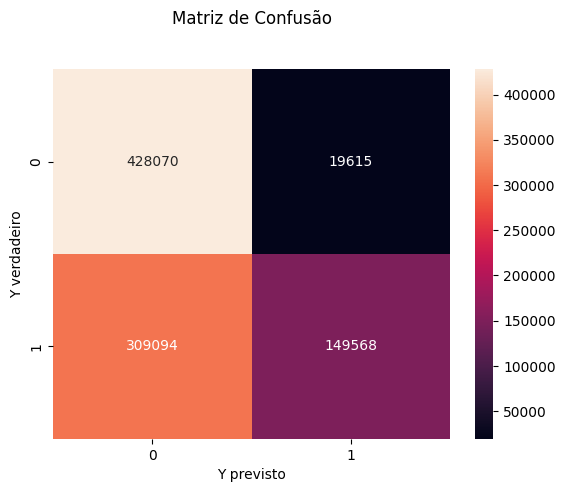

In [ ]:
X_train = df_train[['is_usa', 'year', 'revenue_linear', 'budget_linear', 'vote_count']].to_numpy()
Y_train = df_train['is_en'].to_numpy()

X_test = df_test[['is_usa', 'year', 'revenue_linear', 'budget_linear', 'vote_count']].to_numpy()
Y_test = df_test['is_en'].to_numpy()

classificador = LogisticRegression()
classificador.fit(X_train, Y_train)

Y_predicted = classificador.predict(X_test)

matriz_confusao = confusion_matrix(Y_test, Y_predicted)

sns.heatmap(pd.DataFrame(matriz_confusao), annot=True, fmt='g')
plt.title("Matriz de Confusão", y=1.1)
plt.ylabel("Y verdadeiro")
plt.xlabel("Y previsto")
